In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict 
import matplotlib.pyplot as plt

In [2]:
def file_to_list(list1):
    relist=[]
    for i in list1:
        with open("D:/data/final_java_project/sep/"+str(i)+".txt","r",encoding="UTF8") as file:
            while(True): 
                rl=file.readline()
                if(not rl):
                    break
                relist.append(rl.split(","))
    return relist
#input 2d list sentence [word,v,word,v]
def wordtodict(l):
    redict=defaultdict(int) 
    count=0
    ss=set(["d","f","uj","c","r","p","mp","u"])#不需要的詞類
    for i in l:
        for j in range((len(i)-1)//2):
            if(not (i[2*j+1] in ss)):
                count+=1
                redict[i[2*j]]+=1
    print(count)
    
    return redict
#取出超過一定次數的word
def getstander_word(d,n):
    relist=[]
    
    item=d.items()

    for i in d.items():

        if(i[1]>n):
            relist.append(i[0])
            
    return relist
def file_to_list(list1):
    relist=[]
    for i in list1:
        with open("D:/data/final_java_project/sep/"+str(i)+".txt","r",encoding="UTF8") as file:
            while(True): 
                rl=file.readline()
                if(not rl):
                    break
                relist.append(rl.split(","))
    return relist
def wordtodict(l):
    redict=defaultdict(int) 
    count=0
    ss=set(["d","f","uj","c","r","p","mp","u"])#不需要的詞類
    for i in l:
        for j in range((len(i)-1)//2):
            if(not (i[2*j+1] in ss)):
                count+=1
                redict[i[2*j]]+=1
    print(count)
    
    return redict
class article_reader:
    def __init__(self,alist,base,sp):
        self.ss=set(["d","f","uj","c","r","p","mp","u"])
        self.artical=alist.copy()
        self.sentence=np.zeros(len(self.artical))
        self.sentence_base=np.zeros(len(self.artical))
        self.base=base
        self.sp=sp

    def give_artical_rank(self):
        for i in range(len(self.artical)):
            self.sentence[i]=self.get_feature_rank(self.artical[i])
            self.sentence_base[i]=self.get_base_rank(self.artical[i])
    def re_article_rank(self):
        re=np.zeros(len(self.artical))
        for i in range(len(self.artical)):
            re[i]=self.get_standard_rank(self.artical[i])
            
        return re
    def get_base_rank (self,lis):
        re=0
        for i in range(len(lis)//2):
            re+=self.base[lis[i*2]]
        return re
    def get_feature_rank(self,lis):
        re=0
        for i in range(len(lis)//2):
            re+=self.sp[lis[i*2]]/(self.base[lis[i*2]]+5) #first arg 10 
        return re
    def get_standard_rank(self,lis):
        re=0
        for i in range(len(lis)//2):
            re+=self.standard_dict[lis[i*2]] #first arg 10 
        return re
    def set_standard_dict(self,dicts):
        self.standard_dict=dicts
    
    def readall(self):
        for i in self.artical:
            temp=""
            for j in range(len(i)//2):
                temp=temp+i[2*j]
            print(temp)
    def readall_(self,article):
        for i in article:
            temp=""
            for j in range(len(i)//2):
                temp=temp+i[2*j]
            print(temp)
    
    def get_sub_article(self,li):
        relist=[]
        for i in li:
            relist.append(self.artical[i])
        return relist
    def change_sp_dict(self,f):
        testarray=self.sentence.copy()
        newarray=0
        for i in range(-4,5,1):
            newarray+=np.roll(testarray,i)*0.7**abs(i)
        newcopy=(newarray.copy())
        newcopy.sort()
        self.sp=wordtodict(self.get_sub_article(np.where(newarray>newcopy[int((newcopy.size)*f)])[0]))
        return newcopy
def create_a_dictindex(alldict={},mini=5):
    #redict={}
    redict=defaultdict(int)
    k=1
    for i in alldict.items():
        if(i[1]>mini):
            redict[i[0]]=k
            k+=1
            #print(k)
    return redict
def save_a_standard_dict(title="",tosave={},dictindex={}):
    savelist=np.zeros(len(dictindex)+1)
    for i in tosave.items():
        temp=dictindex.get(i[0])
        if(temp!=None):
            savelist[temp]=i[1]
    with open("D:/data/final_java_project/from_python/"+title+".txt","w") as file:
        file.write(",".join(savelist.astype(str)))
    return savelist
def save_a_dictindex(tosave={}):
    temp=[x[0]+","+str(x[1]) for x in tosave.items()]
    with open("D:/data/final_java_project/from_python/"+"indexdict"+".txt","w",encoding="UTF8") as file:
        temp="\n".join(temp)
        temp=temp.replace(":","er")
        temp=temp.replace(".","er")
        temp=temp.replace("(","er")
        temp=temp.replace(")","er")
        temp=temp.replace("\"","er")
        file.write(temp)


In [59]:
atype = defaultdict(str)
alltype=[]
with open("D:/data/final_java_project/bridge.txt","r",encoding="UTF8") as file:
    file.readline()
    while(True):
        line=file.readline()
        if (not line):
            break
        linenew=line.replace("\n","")
        alltype.append(linenew)
        atype[linenew]=file.readline()
        
def create_new_dict(cut,dicsp={},dicbase={}):
    redict=defaultdict(int)
    for i in dicsp.keys():
        redict[i]=(dicsp[i]/(dicbase[i]+10))/cut
    return redict

In [16]:
atype["食記"]

'1099,2971,3448,3634,4471,4732,4780,4784,4801,4803,4831,4844,4853,4899,4914,4925,4927,4928,4929,4944,4948,4950,4959,4973,4983,4985,4992,5000,5019,5024,5033,5038,5046,5047,5049,5052,5056,5081,5085,5120,5124,5129,5151,5162,5192,5212,5243,5253,5265,5271,5277,5289,5292,5326,5328,5337,5353,5356,5378,5379,5392,5394,5431,5435,5446,5460,5485,5488,5523,5537,5571,5600,5605,5610,5611,5612,5631,5632,5635,5641,5649,5685,5693,5711,5717,5732,5757,5763,5764,5782,5807,5808,5816,5819,5824,5835,5848,5884,5888,5904,5911,5916,5949,5974,5978,6019,6022,6033,6037,6055,6056,6191,6197,6202,6213,6223,6289,6296,6344,6353,6357,6363,6370,6381,6383,6393,6395,6397,6414,6415,6447,6455,6462,6499,6522,6525,6536,6540,6555,6569,6584,6587,6588,6602,6615,6622,6631,6634,6636,6643,6644,6658,6666,6680,6686,6688,6698,6720,6745,6774,6783,6793,6810,6832,6855,6887,6919,6923,6936,6944,6947,6999,7000,7010,7028,7051,7062,7072,7085,7126,7127,7154,7158,7159,7164,7166,7210,7220,7260,7280,7289,7291,7299,7332,7403,7409,7483,7488,7489,7526

In [6]:
needall=[]
for i in range(38251):
    needall.append(str(i))

In [5]:
standerword=getstander_word(wordtodict(file_to_list(needall)),10)

FileNotFoundError: [Errno 2] No such file or directory: 'D:/data/final_java_project/sep/38252.txt'

In [7]:
a={"a":4,"b":2727,"c":2,"d":34}
b=create_a_dictindex(a)
c={"a":4,"b":2727,"c":2,"d":34}
print(b)
print(save_a_standard_dict("test",c,b))

NameError: name 'create_a_dictindex' is not defined

In [35]:
a=defaultdict(int)
a["a"]=1
a["b"]=2
a["c"]
print(a)

defaultdict(<class 'int'>, {'a': 1, 'b': 2, 'c': 0})


#### no need to run

In [7]:
basedict=wordtodict(file_to_list(needall))

15323916


### start

#### 要用到的資料

In [8]:
dictindex=create_a_dictindex(basedict,mini=5)

In [9]:
len(dictindex)

52377

### save

In [10]:
save_a_dictindex(dictindex)

In [ ]:
setnoneed=set(np.random.randint(38000,size=5000).astype(str))

973284
340570
328285
328285
32221
1.4319118224868272
973284
390862
378344
378344
32917
973284
390862
378344
378344
32917


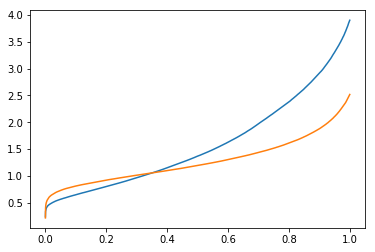

In [66]:
setneed=set(atype["櫻"].split(",")[0:-1]).union(set(atype["楓"].split(",")[0:-1]))
tokill=list(setnoneed-setneed)
needarticle=file_to_list(list(setneed))
killarticle=file_to_list(list(tokill))
savedict=getbestdict(needarticle,killarticle)

In [70]:
save_a_standard_dict("賞櫻賞楓",savedict,dictindex)

array([0.        , 0.003731  , 0.00363831, ..., 0.        , 0.        ,
       0.        ])

defaultdict(int,
            {'旅日': 1,
             '前輩': 2,
             '好': 3,
             '幾': 4,
             '年': 5,
             '板': 6,
             '關係': 7,
             '讓': 8,
             '旅行': 9,
             '遇到': 10,
             '問題': 11,
             '來': 12,
             '爬': 13,
             '文': 14,
             '可以': 15,
             '得到': 16,
             '解決': 17,
             '平成': 18,
             '經驗': 19,
             '分享': 20,
             '自由行': 21,
             '遺失': 22,
             '物品': 23,
             '是': 24,
             '發生': 25,
             '事': 26,
             '（': 27,
             '帶': 28,
             '人': 29,
             '一起': 30,
             '去': 31,
             '時候': 32,
             '更容易': 33,
             '）': 34,
             '統計': 35,
             '下來': 36,
             '：': 37,
             '錢包': 38,
             '三': 39,
             '次': 40,
             '要': 41,
             '個': 42,
             '副': 43,
             '3': 44,


In [44]:
def get_standard_dict(needarticle,killarticle,f,c):
    test1=article_reader(needarticle
                         ,basedict,wordtodict(needarticle))     
    
    for i in range(2):
        test1.give_artical_rank()
        test1.change_sp_dict(f)

    newcopy1=test1.change_sp_dict(f)


    test2=article_reader(killarticle,basedict,test1.sp)
    test2.give_artical_rank()
    newcopy2=test2.change_sp_dict(0.99)
    newcopy2.sort()
    cut=newcopy2[int(newcopy2.size*0.85)] # 如果丟無關的文章可以刪去95%
    testdict=create_new_dict(cut,test1.sp,basedict)#save :
    test1.set_standard_dict(testdict)
    p=test1.re_article_rank()
    newarray=0
    for i in range(-4,5,1):
        newarray+=np.roll(p,i)*0.7**abs(i)
    newarray.sort()
    #下圖表示丟入有關的資料會消去
    return (testdict,newarray[int(newarray.size*0.5)],newarray,newcopy2)
    

#### 找出表現最好的dict (在去除90%無關資料的條件下，使有關資料得分最大化)

In [13]:
def getbestdict(needarticle,killarticle):
    hold=0
    memory=[]
    for i in range(14,0,-1):
        temp=get_standard_dict(needarticle,killarticle,i/20,i)
        if(hold>temp[1]):
            temp=get_standard_dict(needarticle,killarticle,i/20,i)
            break
        hold=temp[1]
        print(temp[1])

    temp[1]
    needp=temp[2]
    noneed=temp[3]
    xsize=needp[0:int(needp.size*0.95)].size
    ysize=noneed[0:int(noneed.size*0.95)].size

    plt.plot(np.array(range(xsize))/xsize,needp[0:int(needp.size*0.95)])
    plt.plot(np.array(range(ysize))/ysize,noneed[0:int(noneed.size*0.95)])
    return temp[0]

In [ ]:
getbestdict(needarticle,killarticle)

### 檢查結果是否合理

In [67]:

test3=article_reader(killarticle[1:5000],{},{})
test3.set_standard_dict(savedict)
p=test3.re_article_rank()
newarray=0
for i in range(-4,5,1):
    newarray+=np.roll(p,i)*0.7**abs(i)
print(len(test3.get_sub_article(np.where(newarray>1)[0])))
test3.readall_(test3.get_sub_article(np.where(newarray>1)[0]))

859
圖文版:靜岡縣大井川鐵道奧大井湖上駅擁有獨特的浮島車站景色
曾被日本電視節目票選為最不可思議的車站更是日本車站百選之一
日本唯一的水上浮島車站、中部賞楓名所、僅存的ABT式鐵道
都在美不勝收的奧大井湖上駅！奧大井湖上駅
迷人特點：這座位於靜岡縣榛原郡川根本町梅地的奧大井湖上駅
有幾個迷人的特點：1.日本唯一的水上浮島車站：特殊的地形地貌
盡享一望無境的療癒景色!!2.日本唯一的ABT式鐵道：大井川鐵道井川線是日本現存唯一的ABT式鐵道(齒軌式登山鐵道)
不管是不是鐵道迷
應該都會非常新奇!!3.中部地區著名賞楓名所：一望無際的特殊地形
秋季楓紅會美不勝收!!造訪美麗的奧大井湖上駅
有兩種交通方式：A.搭乘大井川鐵道前往：從金谷搭乘大井川鐵道本線至千頭
轉井川線至奧大井湖上駅下車1.大井川鐵道本線的起點是靜岡縣的金谷
金谷彙集了JR東海道本線是靜岡的交通樞紐之一交通非常方便
2.從金谷到千頭這一段稱為大井川本線全線共有19個車站
需再轉乘大井川鐵道井川線
井川線全線共有14個車站備註1：井川線是日本現存唯一的ABT式鐵道(齒軌式登山鐵道)
這個不管是不是鐵道迷
應該都超喜歡!!ABT鐵道介紹按這裏!!大井川鐵道官網ABT列車介紹按這裏!ABT齒軌鐵路是一種登山鐵路
一般鐵路可以攀爬的斜坡坡度約為4%至6%ABT齒軌鐵路在鐵軌中間的軌枕上
另外放置一條特別的齒軌行走齒軌鐵路的特製火車
配合齒軌行進便能克服黏著力不足的問題把火車拉上斜坡
備註2：大井川鐵道井川線班次更少每天只有6班
一定要仔細確認好時刻表避免回程無車可搭
時刻表按這裏!!B.租車自駕前往奧大井湖上駅：奧大井湖上駅MAPCODE:438892661從靜岡金谷出發到奧大井湖上駅大約是60公里
大約需要的時間是1.5~2小時備註：雖然沿途風景很漂亮
行程很自由不必在乎火車的時間但是這段60公里的山路並不好開
很多地段山路蜿蜒、單向通車租車自駕要三思^^奧大井湖上駅
依交通工具不同行程規劃：1.搭乘大井川鐵道前往：於奧大井湖上駅下車–車站觀景臺–穿越湖上游步道–最佳展望點備註1：湖上游步道並不算好走
單程就需要20~30分鐘備註2：奧大井湖上駅位於山區地點非常偏僻
火車班次又很少如果真的不小心錯過火車可以從湖上游步道往北再走30分鐘
前往接岨峡温泉求援備註3：湖上游步道內指標很清楚
不用擔心迷路的問題
只

In [69]:
test3=article_reader(needarticle[1:5000],{},{})
test3.set_standard_dict(savedict)
p=test3.re_article_rank()
newarray=0
for i in range(-4,5,1):
    newarray+=np.roll(p,i)*0.7**abs(i)
print(len(test3.get_sub_article(np.where(newarray>1)[0])))
test3.readall_(test3.get_sub_article(np.where(newarray>1)[0]))

3496
24上野公園基本上是這樣約開3成26新宿御苑基本上是這樣
都是花苞有幾株開了預計今晚會去千鳥之淵再跟大家分享
SentfrommyAndroid

因為照片比較多所以這裏也分成兩篇來寫有興趣看照片的人請移駕至部落格
但若沒興趣的人我這邊會比較濃縮的用文字來介紹北海道大學
＊＊北海道大學（上）：賞楓篇（附錄：白楊木林道）＊＊北海道大學（下）：銀杏篇旅行時間：2014．10．31北海道旅行的第二天安排在札幌觀光
這天使用地下鐵一日券我們先從貍小路這邊搭車到札幌車站
接著大概走約10分鐘左右就可以到達北海道大學但是到達的地點是正門
若是要直接去看銀杏道的人請搭地下鐵到「北12条站」下車
那邊走去「北13条門」比較近銀杏道就在這邊
＊＊北海道大學官網：正門口這邊有「エルムの森（榆樹之森）」
官網：這邊是信息中心裡頭有觀光情報、校園訊息、各式紀念品及特產販售
以及提供輕食飲料等販賣接著就看到一旁有塊大石上頭刻著「大志を抱いて」
「（少年よ）大志を抱いて」（Boys
beambitious.）『少年啊～要胸懷大志』看到原文就想到TOKIO的「AMBITIOUSJAPAN!」
我好喜歡TOKIO的這首歌非常的鼓舞人心
Beambitious!我が友よ　冒険者よBeambitious!旅立つ人に　栄光あれBeambitious!聽了感覺就是
往前衝、向前行抱著理想跟目標直直的往前進「Boys
beambitious!」這句話是日本北海道札幌農學校（北海道大學前身）的首任校長威廉·史密斯·克拉克博士對著學生們所說的訓示
而今這句話也是北海道大學的校訓我沒拍到克拉克博士的半身像
因為沒注意到北海道大學校內只有克拉克博士的半身像而已
（如果資料沒錯誤應該是這樣）若是想拍克拉克博士那個手指著遠方的全身雕像就要去「さっぽろ羊ケ丘展望台（羊丘展望台）」才看得到喲
（我們這回沒去那邊）然後就一路上到處拍照因為有不少楓樹可以拍
所以花了點時間停留拍完照後繼續慢慢走經過了...「綜合博物館」
官網：裡頭有像是恐龍、動植物、水生動物等標本展示這是免費參觀的
不過目前休館中我剛剛看了一下官網現在正在做耐震工事
施工時間為：2015年4月1日～2016年7月
關於開館日就請自己上官網查詢囉～接著走到「中央食堂」
我們從這條路轉進去一直走到底就可以看到「ポプラ並木（白楊木林道）」
在一旁有解說牌子

不過去的時候館內的櫻花還有很多都沒開反倒是河岸兩邊的櫻花更盛開
撫慰了我的心靈櫻花樹下有很多日本人就舖著野餐墊
拿出各式各樣的料理吃了起來而既然有櫻花那麼便少不了食物攤販啦！
我買了糖葫蘆、章魚燒和冰飲料坐在攤販裏面吃了起來
但是美色度和美味度不成比例看來還不錯的熱狗吃起來也是還好而已
印象中二訪時他纔剛報到實習而已～）應該四訪了吧
彩彩已經變成我到大阪必訪店家之一了除了第一次到訪時排快1個小時的隊
後來幾乎都是20分鐘內就進場享用彩彩吃拉麪、マンジェ吃豬排
以上都快變成自己的定番行程了今年4月準備帶老媽來賞櫻
2016年6月11日～7月中旬(查了很多資料目前真的就是寫到中旬)
東京都渋谷区神宮前1-15-2神宮前115ビル2F、3F
營業時間：2F商品區10:00～20:00／3F咖啡廳10:00～20:00
到訪時間2016
網誌久久沒有踏足限定咖啡的瓶顆終於又出動了！這次到訪的是開在原宿的櫻桃小丸子限定咖

飛騨花里の湯--高山桜庵ADD：岐阜県高山市花里町4-126
TEL：0577-37-2230官網：圖文版:文字版:
結束白川鄉行程之後我們來到了飛騨花里の湯--高山桜庵
(岐阜県高山市花里町4-126、TEL：0577-37-2230)
前幾天有分享過和歌山的海舟　以及京都DormyInn和這間高山桜庵都是同一集團的唷!
(從高山站邊就可以看到離車站5分鐘)這次換個順序
在看房間之前先瞧一下官網照片瞭解飛騨花里の湯是在說什麼
這邊的溫泉賣點是可以俯瞰整個高山市市內最高溫泉到了冬天也是賞雪溫泉
等待室有放養樂多等飲品泡完可以清涼一下另外和海舟一樣
館內有3處「貸切風呂」for情侶或家族分別是「枝垂れ」、「白雪」、「東錦」
同樣可以眺望整個市區接著來看房間情形有大大發現嗎?高山櫻庵和海舟一樣一進門
服務人員就會幫你妳擦行李輪胎、放鞋子全館都是榻榻米
是可以脫鞋的!連房間大小、風格都不得不說頗有幾分相似
(下圖是海舟)最後是餐點分享早餐是自助式約有60種高山地區鄉土料理可以自由享用!
晚餐是主打「飛騨牛の朴葉味噌御膳」因為飛騨牛就是當地最強大的食材~
而且是一年四季都吃得到的美味唷!いただきます！愛家愛臺灣愛京都

無音樂圖多網誌:時間:201415距離滿開:應該有凋謝的情況(御室櫻)
地點:仁和寺待在京都的時間414~18下次一定定早一周....
這個時間的

In [ ]:
test1=article_reader(needarticle
                    ,basedict,wordtodict(needarticle))     
    
for i in range(2):
    test1.give_artical_rank()
    test1.change_sp_dict(f)
f=0.4
newcopy1=test1.change_sp_dict(f)


test2=article_reader(needarticle2,basedict,test1.sp)
test2.give_artical_rank()
newcopy2=test2.change_sp_dict(0.99)
cut=newcopy2[int(newcopy2.size*0.85)] # 如果丟無關的文章可以刪去90%
testdict=create_new_dict(cut,test1.sp,basedict)#save :
test1.set_standard_dict(testdict)
p=test1.re_article_rank()
newarray=0
for i in range(-4,5,1):
    newarray+=np.roll(p,i)*0.7**abs(i)


plt.plot(newarray[0:int(newarray.size*0.5)])#下圖表示丟入有關的資料會消去

In [ ]:
test2.set_standard_dict(testdict)
p=test2.re_article_rank()
newarray=0
for i in range(-4,5,1):
    newarray+=np.roll(p,i)*0.7**abs(i)
newarray.sort()

plt.plot(newarray[0:int(newarray.size*0.9)])#下圖表示丟入有關的資料會消去
print(newarray[int(newarray.size*0.9)])

### other

In [ ]:
import matplotlib.pyplot as plt
xsize=newcopy1[0:int(newcopy1.size*0.995)].size
ysize=newcopy2[0:int(newcopy2.size*0.995)].size
l1=plt.plot(newcopy1[0:int(newcopy1.size*0.995)],np.array(range(xsize))/xsize)
l2=plt.plot(newcopy2[0:int(newcopy2.size*0.995)],np.array(range(ysize))/ysize)
plt.show()
print(newcopy2[int(newcopy2.size*0.8)])#cutnumber

In [ ]:
cut=newcopy2[int(newcopy2.size*0.90)]
testdict=create_new_dict(cut,test1.sp,basedict)
test2.set_standard_dict(testdict)
p=test2.re_article_rank()
newarray=0
for i in range(-4,5,1):
    newarray+=np.roll(p,i)*0.7**abs(i)
newarray.sort()
plt.plot(newarray[0:int(newarray.size*0.90)])

In [ ]:
test2.set_standard_dict(testdict)
p=test2.re_article_rank()
newarray=0
for i in range(-4,5,1):
    newarray+=np.roll(p,i)*0.7**abs(i)
print(len(test2.get_sub_article(np.where(newarray>1)[0])))
test2.readall_(test2.get_sub_article(np.where(newarray>1)[0]))


In [ ]:
test1.readall_()

In [ ]:
class Dataframe_like:
    def __init__(self,standard_word):
        self.word_dict=defaultdict(int) # word => index of word in array
        self.allword=standerword.copy()
        for i in range(len(standard_word)):
            self.word_dict[standard_word[i]]=i
        self.array=[] #2d [ nparray ,nparray... ]
        self.feature=[] #1d ["food","travel",...]
    def add_a_feature(self,feature,d):
        self.feature.append(feature)
        newa=np.zeros(len(self.allword))
        for i in self.allword:
            temp=d.get(i)
            if(temp!=None):
                newa[self.word_dict.get(i)]=temp
        self.array.append(newa)
    def get_all_feature(self):
        return self.feature.copy()
    
    
    def show_all(self,n):
        print(self.feature)
       # print(self.word_dict.items()[0:n])
        print(self.allword[0:n])
        

In [ ]:
test1.readall_(test1.get_sub_article(np.where(newarray>newcopy[(newcopy.size)//2])[0]))

In [ ]:
test1.readall_(test1.get_sub_article(np.where(newarray<newcopy[(newcopy.size)//2])[0]))